In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Neural Networks

## Explanation of neural networks

Activation functions:<br>
- Relu
- tanh
- Sigmoid

Cost/Loss functions:<br>
- Mean squared erroe
- Mean absolute error
- Hinge Loss

Gradient descent explanation

Optimizers:<br>
- Gradient descent
- Stochastic gradient descent
- Mini-batch gradient descent
- Momentum
- Nesterov accelerated gradient


## Creating a neural network

Loading dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
type(train_images)

numpy.ndarray

In [5]:
train_images[0, 23, 23]

194

Lets look at the labels

In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Showing an image

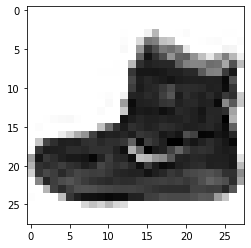

In [15]:
i = 0
plt.figure()
plt.imshow(train_images[i],  cmap=plt.cm.binary)
plt.show()

Data preprocessing

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Building the model

In [10]:
model = keras.Sequential([ keras.layers.Flatten(input_shape=(28,28)), keras.layers.Dense(128, activation='relu'), keras.layers.Dense(10, activation='softmax')])

Compile the model

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Fit/Train model

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4944 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3761 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3368 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3117 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2954 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2811 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2671 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2554 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2475 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.236

Evaluating the model

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

313/313 [==============================] - 1s 1ms/step - loss: 0.3409 - accuracy: 0.8821


Overfitting 0.8821 < 0.9115

Making predictions

In [16]:
predictions = model.predict(test_images)

[8.1256658e-06 8.1173696e-10 8.7681474e-07 4.8918697e-10 3.4908578e-06
 2.4002114e-02 6.3879185e-07 9.8339133e-03 1.4105828e-07 9.6615076e-01]
9
Guess: Ankle boot


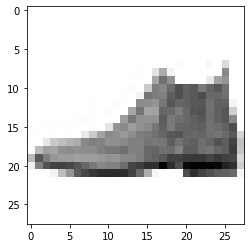

Expected: Ankle boot


In [40]:
i = 0
print(predictions[i])
print(np.argmax(predictions[i]))
print('Guess:', class_names[np.argmax(predictions[i])])
plt.figure()
plt.imshow(test_images[i],  cmap=plt.cm.binary)
plt.show()
print('Expected:', class_names[test_labels[i]])

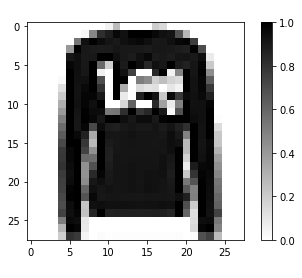

In [34]:
# doesnt work on my machine
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)